In [353]:
your_local_path="C:/Users/Vivek/"

In [354]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [355]:
#Load Credit Default File
cred_df = pd.read_csv(your_local_path+"attachment_default.csv")
cred_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [356]:
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


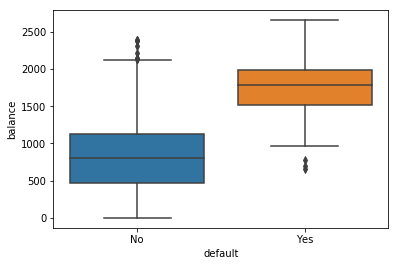

In [357]:
sns.boxplot(x='default', y='balance', data=cred_df)
plt.show()

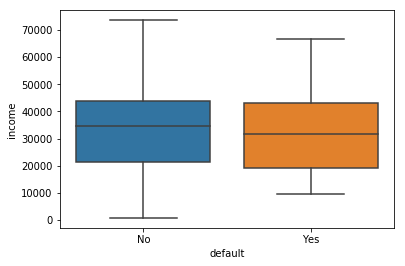

In [358]:
sns.boxplot(x='default', y='income', data=cred_df)
plt.show()

In [359]:
cred_df['lowIncome']=cred_df['income'].apply(lambda x: '1' if x <= 25000 else '0')

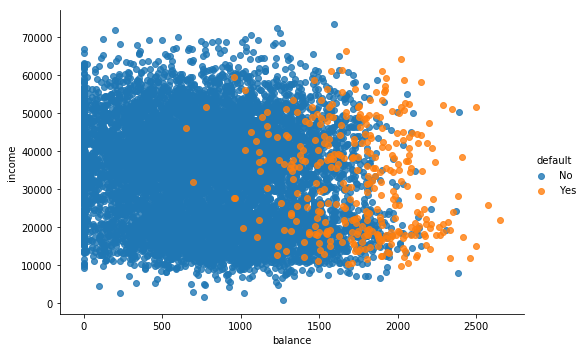

In [360]:
sns.lmplot(x='balance', y='income', hue = 'default', data=cred_df, aspect=1.5, fit_reg = False)
plt.show()

In [361]:
pd.crosstab(cred_df['default'], cred_df['student'], rownames=['Default'], colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


In [362]:
# Convert Categorical to Numerical
default_dummies = pd.get_dummies(cred_df.default, prefix='default')
default_dummies.drop(default_dummies.columns[0], axis=1, inplace=True)
cred_df = pd.concat([cred_df, default_dummies], axis=1)
cred_df.head()
#default_dummies
#we consider 0 as defaulter and 1 as non defaulter

,default,student,balance,income,lowIncome,default_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [363]:
# Building Linear Regression Model
from sklearn.linear_model import LinearRegression

X = cred_df[['balance']]
y = cred_df['default_Yes']

linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.coef_)
print(linreg.intercept_)

[0.00012987]
-0.07519195884622226


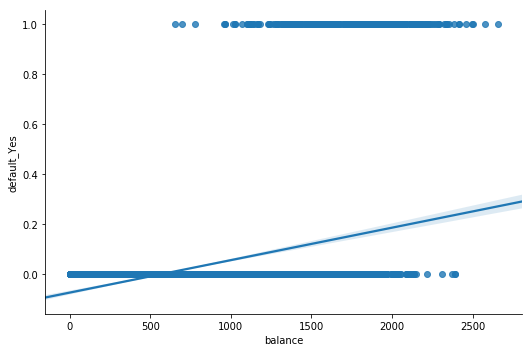

In [364]:
sns.lmplot(x='balance', y='default_Yes', data=cred_df, aspect=1.5, fit_reg = True)

In [365]:
X.balance.values

array([ 729.52649521,  817.18040656, 1073.54916401, ...,  845.41198922,
       1569.00905338,  200.92218263])

[[0.00478248]]
[-9.46506555]


(0, 1)

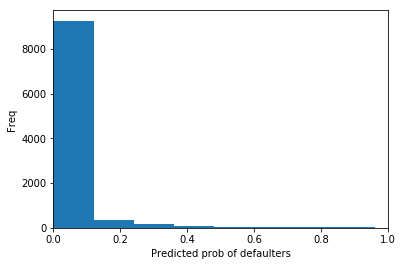

In [366]:
#calling logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)

#default threshold value for logistic regression is 0.5, it means anything above 0.5 is belong to defaulted people (1) 
#and below belong to non defaulted people (0) 
#but due to high class imbalance it should not be 0.5 so we change the threshold using binarizer
y_pred = logreg.predict_proba(X)

#lets plot data distribution to identify threshold value
plt.hist(y_pred[:,1],bins=8)
plt.xlabel('Predicted prob of defaulters')
plt.ylabel('Freq')
plt.xlim(0,1)

#since data distribution is positively skewed or right skewed so we will take threshold as 0.1

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 1.]
 [1. 0.]]


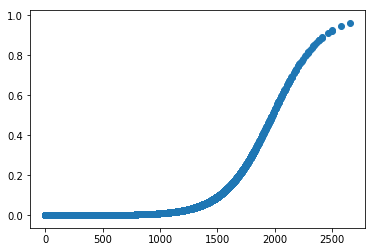

In [367]:
from sklearn.preprocessing import binarize
threshold=0.1
y_pred_binary=binarize(y_pred,threshold)
print(y_pred_binary)
plt.scatter(X.balance.values, y_pred[:,1])
#plt.scatter(X.values, y)
plt.show()

In [368]:
y_pred

array([[9.97467775e-01, 2.53222488e-03],
       [9.96154193e-01, 3.84580671e-03],
       [9.87014365e-01, 1.29856348e-02],
       ...,
       [9.95600704e-01, 4.39929595e-03],
       [8.76675206e-01, 1.23324794e-01],
       [9.99797417e-01, 2.02582703e-04]])

In [369]:
y_pred[:,0]

array([0.99746778, 0.99615419, 0.98701437, ..., 0.9956007 , 0.87667521,
       0.99979742])

#### Creating logistic model

In [370]:
cred_df.head()

,default,student,balance,income,lowIncome,default_Yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [371]:
X.head()

,balance
0,729.526495
1,817.180407
2,1073.549164
3,529.250605
4,785.655883


In [372]:
#splitting the data into train and test with 70:30 ratio
from sklearn.cross_validation import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=12345)

In [373]:
#calling logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#for imbalanced classes in order to make balanced mix of each class we use 
#weight(class j)=no of observation/(no of objervation in class j * total no of classes)
logreg = LogisticRegression(class_weight='balanced')

#assign user defined class weight
#logreg = LogisticRegression(class_weight={0:0.3,1:0.7})

logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)



[[0.00541355]]
[-7.15235304]


In [374]:
#fitting the model with x and y attributes of train data
#in this it is goin to learn the pattern
logreg.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [375]:
#now applying our learnt model on test and also ontrain data
y_log_pred_test = logreg.predict(xTest)
y_log_pred_train = logreg.predict(xTrain)

In [376]:
#comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(yTest, y_log_pred_test)

0.8653333333333333

In [377]:
metrics.f1_score(yTest, y_log_pred_test)

0.28113879003558717

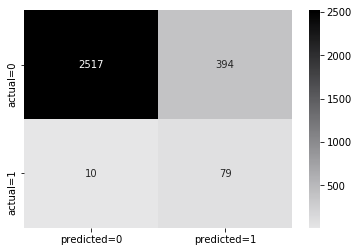

In [378]:
#creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(yTest, y_log_pred_test)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['predicted=0','predicted=1'],
            yticklabels=['actual=0','actual=1'],annot=True, fmt="d")

In [379]:
print(metrics.classification_report(yTest,y_log_pred_test))

             precision    recall  f1-score   support

          0       1.00      0.86      0.93      2911
          1       0.17      0.89      0.28        89

avg / total       0.97      0.87      0.91      3000



In [380]:
#now applying our learnt model on test and also on train data with diffrent threshold and class weight
y_prob_pred_test = logreg.predict_proba(xTest)
y_prob_pred_train = logreg.predict_proba(xTrain)
print(y_prob_pred_test)
from sklearn.preprocessing import binarize
threshold=0.7
y_prob_pred_test_binary=binarize(y_prob_pred_test,threshold)
y_prob_pred_train_binary=binarize(y_prob_pred_train,threshold)
print(y_prob_pred_test_binary)

[[0.08595755 0.91404245]
 [0.05727542 0.94272458]
 [0.9766641  0.0233359 ]
 ...
 [0.99082434 0.00917566]
 [0.98442593 0.01557407]
 [0.81217204 0.18782796]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [381]:
#comparing the metrics of predicted lebel and real label of test data
metrics.accuracy_score(yTest, y_prob_pred_test_binary[:,1])

0.9283333333333333

In [382]:
metrics.f1_score(yTest, y_prob_pred_test_binary[:,1])

0.4044321329639889

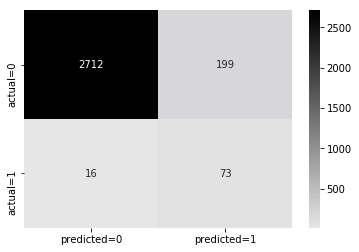

In [383]:
#creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(yTest, y_prob_pred_test_binary[:,1])
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['predicted=0','predicted=1'],
            yticklabels=['actual=0','actual=1'],annot=True, fmt="d")

In [384]:
#threshold can be adjusted to increase sensitivity or specificity,
#sensitivity and specificity has inverse relation, increasing one will always decrease the other
print(metrics.classification_report(yTest, y_prob_pred_test_binary[:,1]))

             precision    recall  f1-score   support

          0       0.99      0.93      0.96      2911
          1       0.27      0.82      0.40        89

avg / total       0.97      0.93      0.95      3000



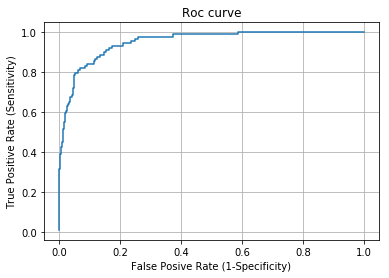

In [385]:
#Receiver operating characteristic curves(ROC curve)
# to know how sensitivity and specificity are affected by various threshold without actually changing threshold
fpr,tpr,thresholds=metrics.roc_curve(yTest, y_prob_pred_test[:,1])
plt.plot(fpr,tpr)
plt.title('Roc curve')
plt.rcParams['font.size']=12
plt.xlabel('False Posive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [386]:
#define a function that accepts a threshold and print sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity',tpr[thresholds>threshold][-1])
    print('specificity',1-fpr[thresholds>threshold][-1])

In [387]:
evaluate_threshold(0.5)

sensitivity 0.8876404494382022
specificity 0.8649948471315699


In [388]:
#AUC is area under ROC curve
#heigher value impliesbetter classifier
print(metrics.roc_auc_score(yTest, y_prob_pred_test[:,1]))

0.9514588214405645


In [389]:
#cross validation score AUC
#By partitioning the training data into k smaller sets and then take average of value computed in loop
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg,X,y,cv=10,scoring='roc_auc').mean()

0.9481909984306194

In [390]:
#null accuracy
print(yTest.value_counts())
max(yTest.mean(),1-yTest.mean())

0    2911
1      89
Name: default_Yes, dtype: int64


0.9703333333333334

In [391]:
# calculate null accuracy (for multi-class classification problems)
yTest.value_counts().head(1) / len(yTest)

0    0.970333
Name: default_Yes, dtype: float64